In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [23]:
data = pd.read_csv('election_table_2.csv')
data.head()

,filename,partisan,level,type,candidates,choices,gamma bf,gamma mds,#1 candidate,#2 candidate,#3 candidate,#4 candidate,#5 candidate,bimodality
0,Alaska_04102020_PRESIDENTOFTHEUNITEDSTATES.csv,DP,3.0,E,8,5,NaN,0.565292,82.995644,76.208084,46.119947,27.879647,27.732753,0.127922
1,Alaska_08162022_HouseofRepresentativesSpecial.csv,1,3.0,R,3,4,0.955330,0.955330,75.102196,64.118993,60.495520,NaN,NaN,0.739850
2,Alaska_11082022_GovernorLieutenantGovernor.csv,1,2.0,E,4,5,0.839619,0.744512,67.218966,51.789617,49.106137,42.659281,NaN,0.898327
3,Alaska_11082022_HouseDistrict1.csv,1,2.0,R,2,3,1.000000,1.000000,63.438293,62.692135,NaN,NaN,NaN,0.930662
4,Alaska_11082022_HouseDistrict2.csv,1,2.0,R,2,3,1.000000,1.000000,67.321454,55.282728,NaN,NaN,NaN,0.924696


In [30]:
# Extract the year from the filename
data['year'] = data['filename'].str.extract('(\d{4})_').astype(float)

# Display the first few rows with the new 'year' column
data.head()

,filename,partisan,level,type,candidates,choices,gamma bf,gamma mds,#1 candidate,#2 candidate,#3 candidate,#4 candidate,#5 candidate,bimodality,year
0,Alaska_04102020_PRESIDENTOFTHEUNITEDSTATES.csv,DP,3.0,E,8,5,NaN,0.565292,82.995644,76.208084,46.119947,27.879647,27.732753,0.127922,2020.0
1,Alaska_08162022_HouseofRepresentativesSpecial.csv,1,3.0,R,3,4,0.955330,0.955330,75.102196,64.118993,60.495520,NaN,NaN,0.739850,2022.0
2,Alaska_11082022_GovernorLieutenantGovernor.csv,1,2.0,E,4,5,0.839619,0.744512,67.218966,51.789617,49.106137,42.659281,NaN,0.898327,2022.0
3,Alaska_11082022_HouseDistrict1.csv,1,2.0,R,2,3,1.000000,1.000000,63.438293,62.692135,NaN,NaN,NaN,0.930662,2022.0
4,Alaska_11082022_HouseDistrict2.csv,1,2.0,R,2,3,1.000000,1.000000,67.321454,55.282728,NaN,NaN,NaN,0.924696,2022.0


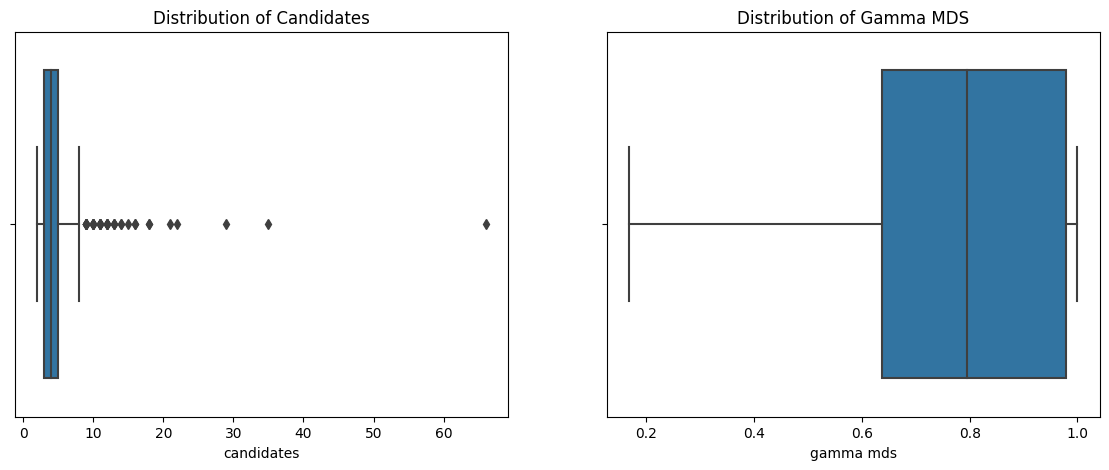

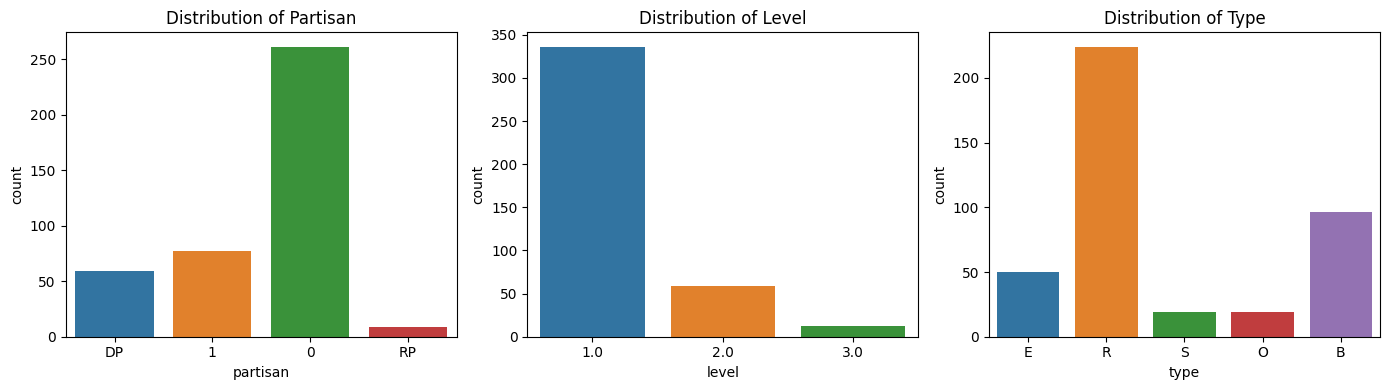

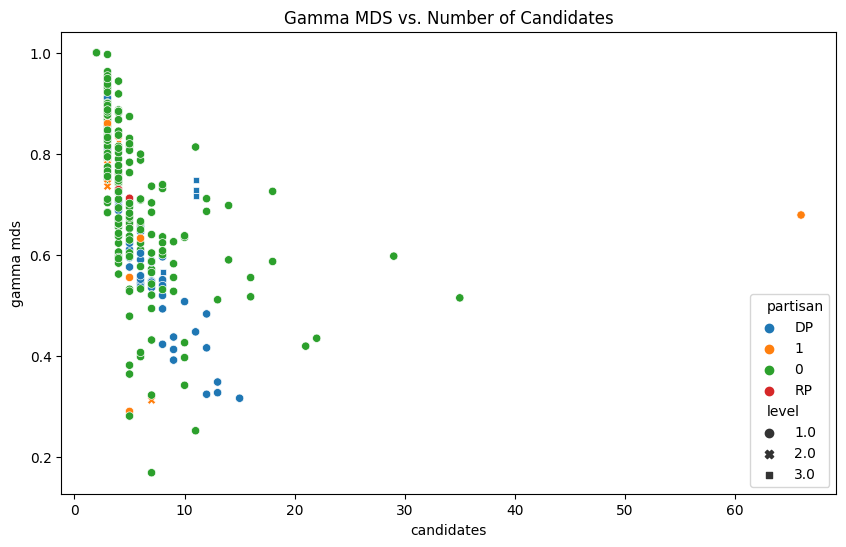

,filename,candidates,choices,gamma bf,gamma mds,#1 candidate,#2 candidate,#3 candidate,#4 candidate,#5 candidate,...,year,partisan_1,partisan_DP,partisan_RP,level_2.0,level_3.0,type_E,type_O,type_R,type_S
0,Alaska_04102020_PRESIDENTOFTHEUNITEDSTATES.csv,8,5,NaN,0.565292,82.995644,76.208084,46.119947,27.879647,27.732753,...,2020.0,False,True,False,False,True,True,False,False,False
1,Alaska_08162022_HouseofRepresentativesSpecial.csv,3,4,0.955330,0.955330,75.102196,64.118993,60.495520,NaN,NaN,...,2022.0,True,False,False,False,True,False,False,True,False
2,Alaska_11082022_GovernorLieutenantGovernor.csv,4,5,0.839619,0.744512,67.218966,51.789617,49.106137,42.659281,NaN,...,2022.0,True,False,False,True,False,True,False,False,False
3,Alaska_11082022_HouseDistrict1.csv,2,3,1.000000,1.000000,63.438293,62.692135,NaN,NaN,NaN,...,2022.0,True,False,False,True,False,False,False,True,False
4,Alaska_11082022_HouseDistrict2.csv,2,3,1.000000,1.000000,67.321454,55.282728,NaN,NaN,NaN,...,2022.0,True,False,False,True,False,False,False,True,False


In [31]:
# Summary statistics for each variable
summary_new = data.describe(include='all')

# Boxplots to visualize the distribution of numeric variables
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

sns.boxplot(x=data['candidates'], ax=axs[0]).set_title('Distribution of Candidates')
sns.boxplot(x=data['gamma mds'], ax=axs[1]).set_title('Distribution of Gamma MDS')

# Bar plots to visualize the distribution of categorical variables
fig, axs = plt.subplots(1, 3, figsize=(14, 4))

sns.countplot(x=data['partisan'], ax=axs[0]).set_title('Distribution of Partisan')
sns.countplot(x=data['level'], ax=axs[1]).set_title('Distribution of Level')
sns.countplot(x=data['type'], ax=axs[2]).set_title('Distribution of Type')

plt.tight_layout()
plt.show()

summary_new

# Removing rows where the number of candidates is less than 2
filtered_data_new = data[data['candidates'] >= 2]

# Visualizing the relationship between the number of candidates and gamma mds
plt.figure(figsize=(10, 6))
sns.scatterplot(x='candidates', y='gamma mds', hue='partisan', style='level', data=filtered_data_new)
plt.title('Gamma MDS vs. Number of Candidates')
plt.show()

# Creating dummy variables for the categorical variables
data_encoded_new = pd.get_dummies(filtered_data_new, columns=['partisan', 'level', 'type'], drop_first=True)

# Checking the first few rows of the new encoded data
data_encoded_new.head()

In [32]:
# Remove rows with missing values
data_clean = data.dropna(subset=['type', 'level', 'partisan'])

# Check the cleaned data
data_clean.isnull().sum()

filename          0
partisan          0
level             0
type              0
candidates        0
choices           0
gamma bf         54
gamma mds         0
#1 candidate      0
#2 candidate      0
#3 candidate    101
#4 candidate    202
#5 candidate    271
bimodality        0
year              0
dtype: int64

In [35]:
data_clean.head()

,filename,candidates,choices,gamma bf,gamma mds,#1 candidate,#2 candidate,#3 candidate,#4 candidate,#5 candidate,...,year,type_E,type_O,type_R,type_S,level_2.0,level_3.0,partisan_1,partisan_DP,partisan_RP
0,Alaska_04102020_PRESIDENTOFTHEUNITEDSTATES.csv,8,5,NaN,0.565292,82.995644,76.208084,46.119947,27.879647,27.732753,...,2020.0,True,False,False,False,False,True,False,True,False
1,Alaska_08162022_HouseofRepresentativesSpecial.csv,3,4,0.955330,0.955330,75.102196,64.118993,60.495520,NaN,NaN,...,2022.0,False,False,True,False,False,True,True,False,False
2,Alaska_11082022_GovernorLieutenantGovernor.csv,4,5,0.839619,0.744512,67.218966,51.789617,49.106137,42.659281,NaN,...,2022.0,True,False,False,False,True,False,True,False,False
3,Alaska_11082022_HouseDistrict1.csv,2,3,1.000000,1.000000,63.438293,62.692135,NaN,NaN,NaN,...,2022.0,False,False,True,False,True,False,True,False,False
4,Alaska_11082022_HouseDistrict2.csv,2,3,1.000000,1.000000,67.321454,55.282728,NaN,NaN,NaN,...,2022.0,False,False,True,False,True,False,True,False,False


In [33]:
import statsmodels.formula.api as smf
from patsy import dmatrices

# Create dummy variables for categorical features
data_clean = pd.get_dummies(data_clean, columns=['type', 'level', 'partisan'], drop_first=True)

# Mixed-effects model for 'gamma mds'
formula_gamma_mds = 'Q("gamma mds") ~ Q("candidates") + ' + ' + '.join([f'Q("{col}")' for col in data_clean.columns if 'type' in col or 'level' in col or 'partisan' in col])
md_gamma_mds = smf.mixedlm(formula_gamma_mds, data_clean, groups=data_clean['year'])
mdf_gamma_mds = md_gamma_mds.fit()

# Mixed-effects model for 'bimodality'
formula_bimodality = 'Q("bimodality") ~ Q("candidates") + ' + ' + '.join([f'Q("{col}")' for col in data_clean.columns if 'type' in col or 'level' in col or 'partisan' in col])
md_bimodality = smf.mixedlm(formula_bimodality, data_clean, groups=data_clean['year'])
mdf_bimodality = md_bimodality.fit()

mdf_gamma_mds.summary(), mdf_bimodality.summary()

/Users/es5891/Library/Python/3.9/lib/python/site-packages/statsmodels/regression/mixed_linear_model.py:2238: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/Users/es5891/Library/Python/3.9/lib/python/site-packages/statsmodels/regression/mixed_linear_model.py:2238: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


(<class 'statsmodels.iolib.summary2.Summary'>
 """
                Mixed Linear Model Regression Results
 Model:               MixedLM   Dependent Variable:   Q("gamma mds")
 No. Observations:    406       Method:               REML          
 No. Groups:          20        Scale:                0.0207        
 Min. group size:     1         Log-Likelihood:       173.8905      
 Max. group size:     95        Converged:            Yes           
 Mean group size:     20.3                                          
 -------------------------------------------------------------------
                          Coef.  Std.Err.   z    P>|z| [0.025 0.975]
 -------------------------------------------------------------------
 Intercept                 0.850    0.023 37.128 0.000  0.805  0.895
 Q("type_E")[T.True]      -0.038    0.028 -1.376 0.169 -0.093  0.016
 Q("type_O")[T.True]       0.076    0.039  1.973 0.048  0.001  0.152
 Q("type_R")[T.True]      -0.013    0.020 -0.653 0.514 -0.053  0.02

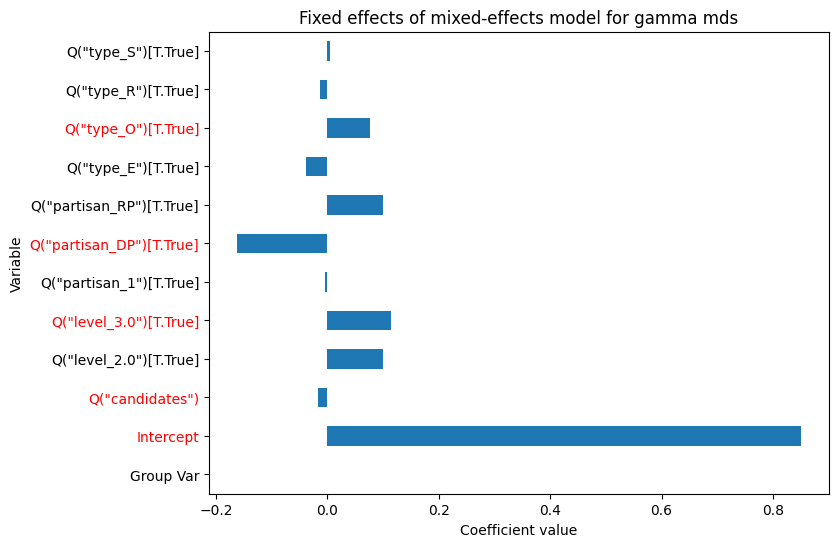

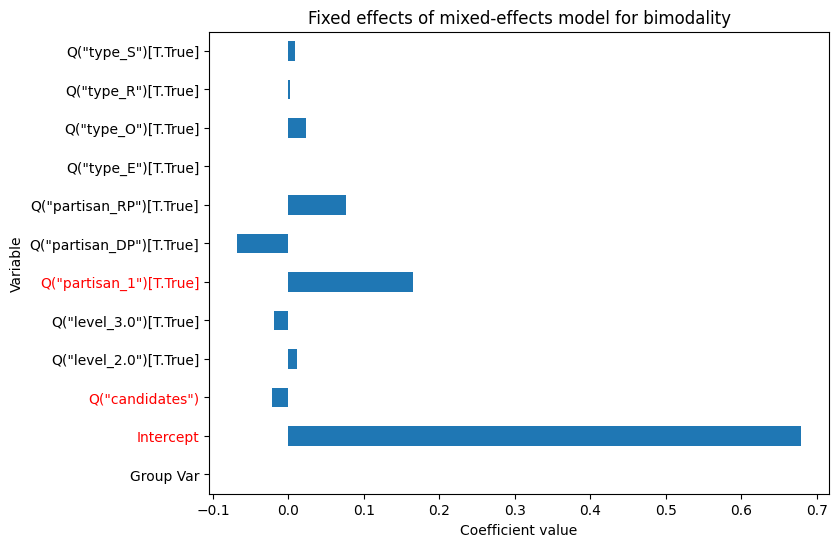

In [34]:
import matplotlib.pyplot as plt
import numpy as np

def plot_coefficients(model, title):
    # Create a dataframe with coefficients and p-values
    coefs_df = pd.DataFrame({
        'coef': model.fe_params,
        'p-value': model.pvalues,
        'significant': model.pvalues < 0.05
    })

    # Plot
    plt.figure(figsize=(8, 6))
    coefs_df['coef'].plot(kind='barh')
    plt.title(title)
    plt.xlabel('Coefficient value')
    plt.ylabel('Variable')
    for i in range(len(coefs_df)):
        if coefs_df['significant'][i]:
            plt.gca().get_yticklabels()[i].set_color('red')
    plt.show()

plot_coefficients(mdf_gamma_mds, title='Fixed effects of mixed-effects model for gamma mds')
plot_coefficients(mdf_bimodality, title='Fixed effects of mixed-effects model for bimodality')

<Figure size 1400x1000 with 0 Axes>

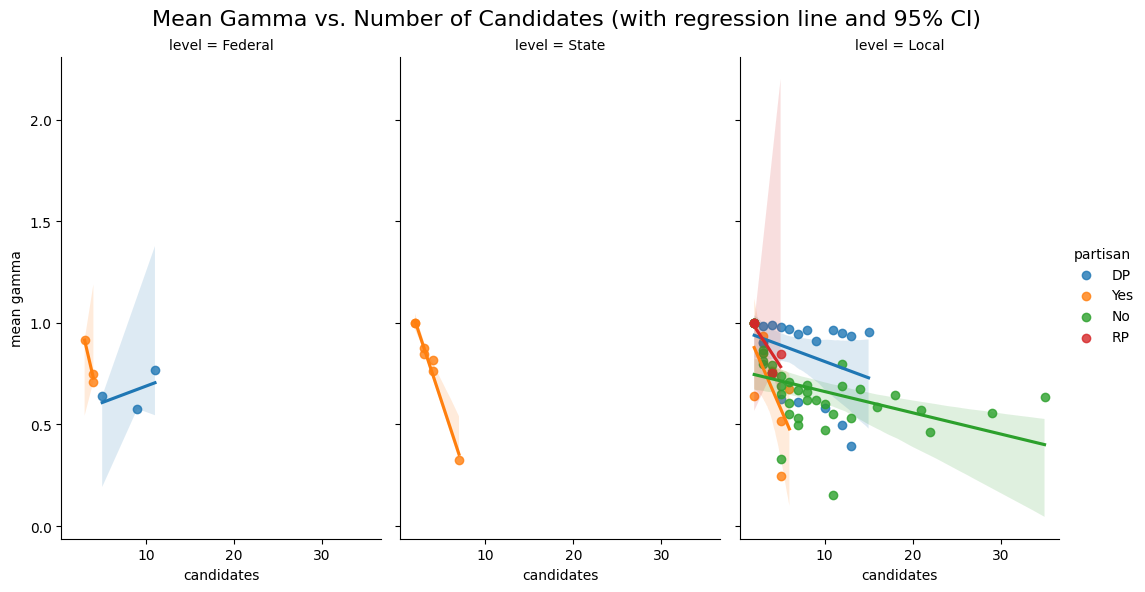

In [32]:
# Relationship between the number of candidates and mean gamma with a trend line for each category
plt.figure(figsize=(14, 10))

sns.lmplot(x='candidates', y='mean gamma', hue='partisan', col='level', data=filtered_data, ci=95, height=6, aspect=0.6)

plt.subplots_adjust(top=0.9)
plt.suptitle('Mean Gamma vs. Number of Candidates (with regression line and 95% CI)', fontsize=16)
plt.show()

In [33]:
# Drop the first level of each categorical variable to prevent multicollinearity
data_encoded = pd.get_dummies(filtered_data, columns=['partisan', 'level', 'type'], drop_first=True)

# Let's import the required function and fit a linear mixed-effects model
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Construct the formula for the initial model
formula = 'Q("mean gamma") ~ candidates + ' + ' + '.join(data_encoded.columns.difference(['Unnamed: 0', 'candidates', 'mean gamma', 'stdev', 'total number of elections']))

# Construct the formula with interaction terms
formula_interactions = formula + ' + candidates:partisan_No + candidates:partisan_RP + candidates:partisan_Yes + candidates:level_Local + candidates:level_State + candidates:type_E + candidates:type_O + candidates:type_R + candidates:type_S'

# Fit the model with interaction terms
mixed_model_interactions = smf.ols(formula_interactions, data=data_encoded)
mixed_model_interactions_fit = mixed_model_interactions.fit()

# Show the model summary
mixed_model_interactions_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Q("mean gamma")   R-squared:                       0.536
Model:                            OLS   Adj. R-squared:                  0.399
Method:                 Least Squares   F-statistic:                     3.897
Date:                Tue, 01 Aug 2023   Prob (F-statistic):           2.20e-05
Time:                        10:53:49   Log-Likelihood:                 49.483
No. Observations:                  84   AIC:                            -58.97
Df Residuals:                      64   BIC:                            -10.35
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                           0.9461      0.203      4.660      0.000       0.541       1.352
level_Local[T.True]                 0.0168      0.174      0.096      0.923      -0.331       0.365
level_State[T.True]                 0.1135      0.273      0.416      0.679      -0.432       0.659
partisan_No[T.True]                -0.2099      0.097     -2.160      0.035      -0.404      -0.016
partisan_RP[T.True]                 0.2450      0.222      1.103      0.274      -0.199       0.689
partisan_Yes[T.True]                0.1501      0.171      0.877      0.384      -0.192       0.492
type_E[T.True]                     -0.1004      0.091     -1.108      0.272      -0.281       0.081
type_O[T.True]                      0.2234      0.141      1.588      0.117      -0.058       0.504
type_R[T.True]                     -0.0107      0.108     -0.099      0.922      -0.226       0.205
type_S[T.True]                     -0.0067      0.429     -0.016      0.988      -0.863       0.850
candidates                         -0.0252      0.026     -0.984      0.329      -0.076       0.026
candidates:partisan_No[T.True]      0.0144      0.012      1.164      0.249      -0.010       0.039
candidates:partisan_RP[T.True]     -0.0650      0.060     -1.083      0.283      -0.185       0.055
candidates:partisan_Yes[T.True]    -0.0830      0.040     -2.064      0.043      -0.163      -0.003
candidates:level_Local[T.True]     -0.0011      0.025     -0.044      0.965      -0.051       0.049
candidates:level_State[T.True]     -0.0083      0.061     -0.135      0.893      -0.130       0.114
candidates:type_E[T.True]           0.0080      0.007      1.124      0.265      -0.006       0.022
candidates:type_O[T.True]          -0.0300      0.025     -1.199      0.235      -0.080       0.020
candidates:type_R[T.True]           0.0188      0.013      1.435      0.156      -0.007       0.045
candidates:type_S[T.True]           0.0117      0.129      0.091      0.928      -0.246       0.270
==============================================================================
Omnibus:                       13.200   Durbin-Watson:                   1.951
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               17.884
Skew:                          -0.700   Prob(JB):                     0.000131
Kurtosis:                       4.774   Cond. No.                         437.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

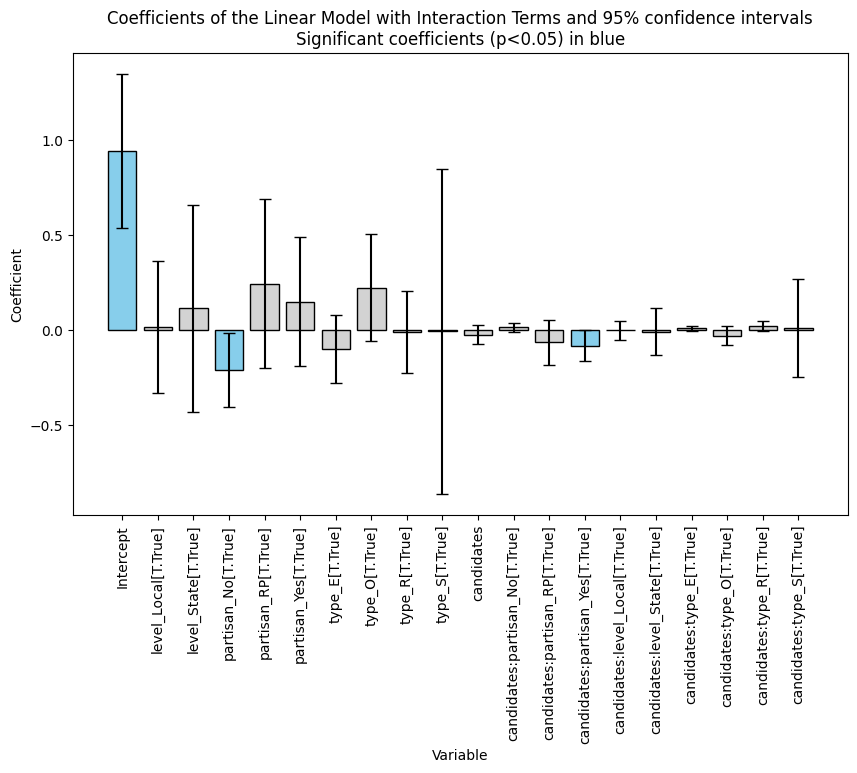

In [34]:
# Get the coefficients and their errors
coefficients_interactions = mixed_model_interactions_fit.params
errors_interactions = mixed_model_interactions_fit.bse

# Get the p-values from the model
p_values_interactions = mixed_model_interactions_fit.pvalues

# Create a new dataframe that includes coefficients, errors and p-values
df_interactions = pd.DataFrame({'coef': coefficients_interactions, 'err': errors_interactions, 'p_value': p_values_interactions})

# Create a new column in the dataframe to hold the colors for each bar
df_interactions['color'] = ['skyblue' if p < 0.05 else 'lightgray' for p in df_interactions['p_value']]

# Plot
plt.figure(figsize=(10, 6))
plt.bar(df_interactions.index, df_interactions['coef'], yerr=df_interactions['err']*2, capsize=4, color=df_interactions['color'], edgecolor='black')
plt.title('Coefficients of the Linear Model with Interaction Terms and 95% confidence intervals\nSignificant coefficients (p<0.05) in blue')
plt.ylabel('Coefficient')
plt.xlabel('Variable')
plt.xticks(rotation=90)
plt.show()